In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [3]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #onpencv與其他函式庫不同的地方是別人都是RGB但她是BGR，所以在此先做轉換。

## 1-1. cluster with only RGB values

In [4]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

[[129 175 100]
 [129 175 100]
 [129 175 100]
 ...
 [153 207 109]
 [153 207 109]
 [153 207 109]]
1048576


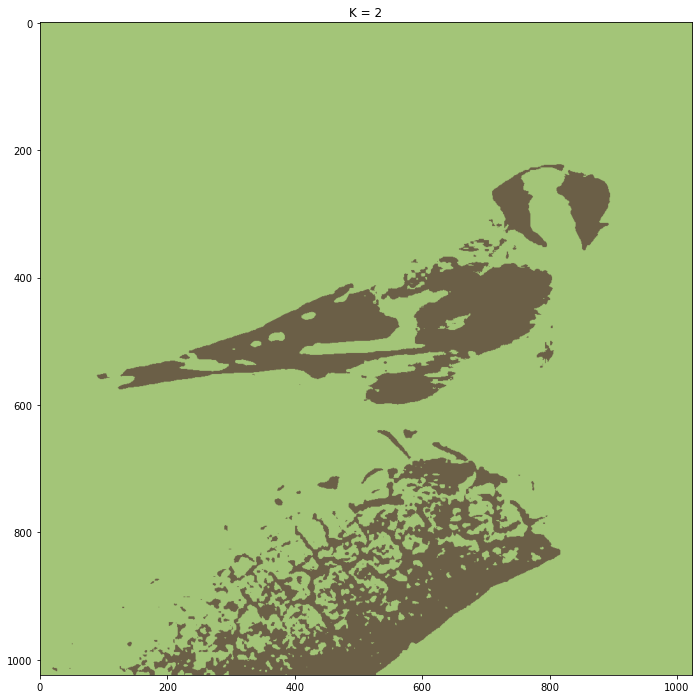

In [18]:
'''
圖片是由點所組成的,每一個點都有一組xy,所以圖是2維的,圖片要有顏色就要靠點有顏色才能做到，所以每個點有rgb三顏色，
圖片就是有顏色的。我們將rgb的三個數值儲存在座標內<需要三個維度才能存放所有數值，前兩個維度放xy位置,最後一個放rgb的值
，但圖片還是2維,多一維是為了放顏色的值，所以shape才會有三個數值顯示是三維。array的陣列中，每一個點放該點顏色的值，
而不放該點的位置，以前所學的數學都是放該點的位置值,現在是放該點的顏色值。為何不放該點的位置值呢?因為該點的位置已由陣列的排續法表達
，故不要再重複表達位置值,僅表達該位置的顏色值。
'''
h, w, c = img.shape # H是row,w是column,c=rgb ,3維但第三個維度(rgb)中又有3個數值
#print(img.shape) #1024,1024是pexil值也就是資料筆數是1024X1024(X*Y)。3是RGB。
Z = img.reshape((-1,3)) # 2維，rgb是xy維肚中的一個值。
print(Z)
print(len(Z)) # 1048576是1024*1024
K = 2
label, center = km_clust(Z, K) #label是分群後(k=2分兩群)，兩群的不同代碼。center是分兩群，每一群自己的顏色代碼。
center = np.uint8(center[:,:3])
res = center[label.flatten()]
res = res.reshape(img.shape)

plt.figure(figsize=(16,12))
plt.title("K = {}".format(K))
plt.imshow(res)

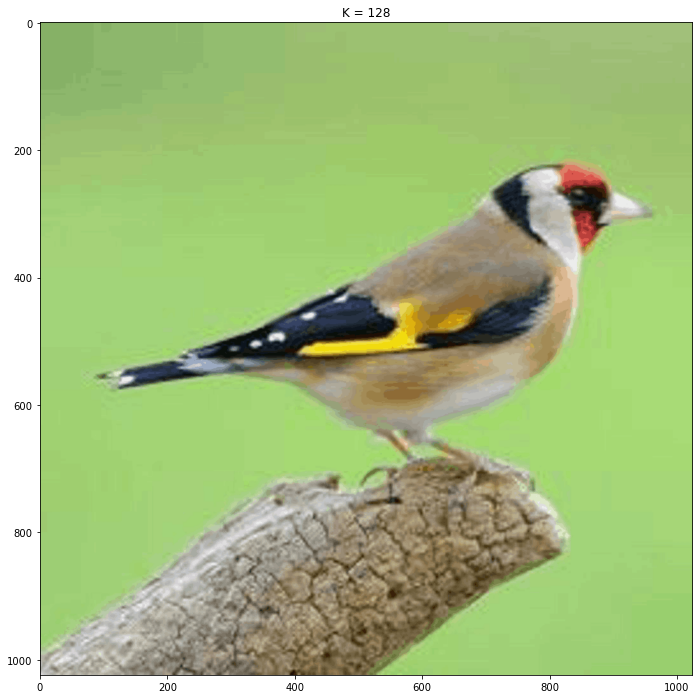

In [10]:
h, w, c = img.shape
#print(img.shape) #1024,1024是pexil值也就是資料筆數是1024X1024(X*Y)。3是RGB。
Z = img.reshape((-1,3))
#Ka = [2, 4, 8, 16, 64]
Ka = [128]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ka):
    label, center = km_clust(Z, K)
    center = np.uint8(center[:,:3])
    res = center[label.flatten()]
    res = res.reshape(img.shape)
    plt.subplot(1, len(Ka), i+1)
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-2. cluster with RGB values and the location

(1024, 1024, 3)
3


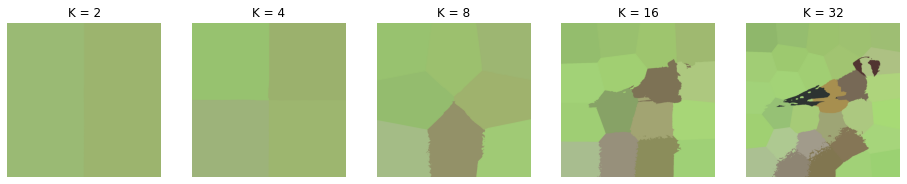

In [42]:
h, w, c = img.shape
print(img.shape)
print(c)
#Added location feature
Z = np.zeros((h, w, c+2)) #h是row,w是column ,此為3維陣列，座標x和y配上rgb是3維,但rgb是三個數字,所以變成有五個數值。
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]]) 
Z = Z.reshape(-1, 5) # 這個2維座標的值會有(rgb和row和column)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

In [41]:
#測試
h, w, c = img.shape
#print(img.shape)
#print(c)
#Added location feature
Z = np.zeros((h, w, c+2)) #h是row,w是column ,此為3維陣列，座標x和y配上rgb是3維,但rgb是三個數字,所以變成有五個數值。
print(Z[:2])
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])  #img[][]再找顏色,後面兩個是位置
print(Z[:2])
#print(Z.shape)
Z = Z.reshape(-1, 5)
#print(Z)

[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]
[[[1.290e+02 1.750e+02 1.000e+02 0.000e+00 0.000e+00]
  [1.290e+02 1.750e+02 1.000e+02 0.000e+00 1.000e+00]
  [1.290e+02 1.750e+02 1.000e+02 0.000e+00 2.000e+00]
  ...
  [1.610e+02 1.900e+02 1.230e+02 0.000e+00 1.021e+03]
  [1.610e+02 1.900e+02 1.230e+02 0.000e+00 1.022e+03]
  [1.610e+02 1.900e+02 1.230e+02 0.000e+00 1.023e+03]]

 [[1.290e+02 1.750e+02 1.000e+02 1.000e+00 0.000e+00]
  [1.290e+02 1.750e+02 1.000e+02 1.000e+00 1.000e+00]
  [1.290e+02 1.750e+02 1.000e+02 1.000e+00 2.000e+00]
  ...
  [1.610e+02 1.900e+02 1.230e+02 1.000e+00 1.021e+03]
  [1.610e+02 1.900e+02 1.230e+02 1.000e+00 1.022e+03]
  [1.610e+02 1.900e+02 1.230e+02 1.000e+00 1.023e+03]]]


In [14]:
print(np.zeros((2, 3)))

[[0. 0. 0.]
 [0. 0. 0.]]


In [19]:
print(np.zeros((5, 3, 4))) #三維,每一維度5列3欄,每一個點4個值
print(np.zeros((5, 3, 4)).shape)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
(5, 3, 4)


## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

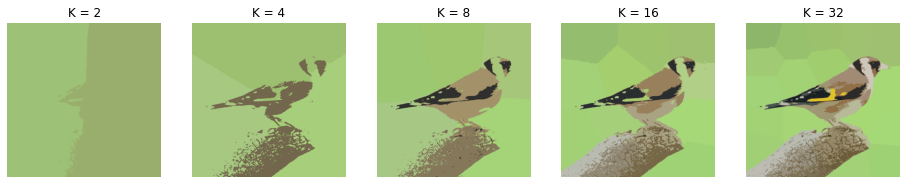

In [29]:
#因rgb三原色的值最大為255，如果我們的xy座標有到1024，會有失真。所以將xy值/4使xy值相近於rgb的值，可使模型訓練效果更好。(有點類似正規化)

(1024, 1024, 3)
3


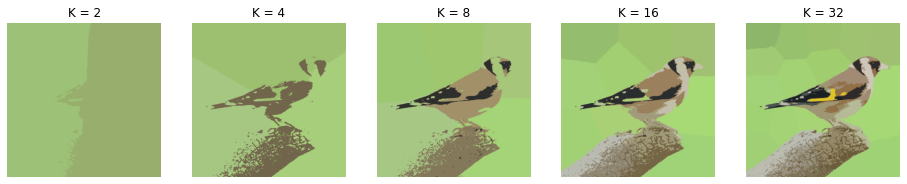

In [43]:
h, w, c = img.shape
#print(img.shape)
#print(c)
#Added location feature
Z = np.zeros((h, w, c+2)) #h是row,w是column ,此為3維陣列，座標x和y配上rgb是3維,但rgb是三個數字,所以變成有五個數值。
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]]) 
Z = Z.reshape(-1, 5) # 這個2維座標的值會有(rgb和row和column)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()